In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Finally, HIRES files

In [6]:
spec_fits_hires = fits.open(rootdir + 'HIRES/PG1522+101_HIRES.fits')
lsf_fits_hires = fits.open(rootdir + 'HIRES/PG1522_HIRES_wavcal2023_lsf.fits')

Compile a list of the spectra, and LSFs

In [7]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis, spec_fits_hires]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis, lsf_fits_hires]

# z= 1.27

In [8]:
z_sys = 1.2776725

## CIV

### CIV 1548 (HIRES)

In [147]:
civ_1548_hires = ion_transition('CIV', 1548, 'C', z_sys, 'HIRES')

In [148]:
civ_1548_hires.grab_ion_transition_info()
#civ_1548_hires.grab_ion_transition_info(delta_v=7)

In [149]:
civ_1548_hires.grab_ion_transition_spec(spec_fits_list)#, delta_wav=0)

In [150]:
civ_1548_hires.cont_norm_flux(v_abs_range=[-40,80], degree=1)

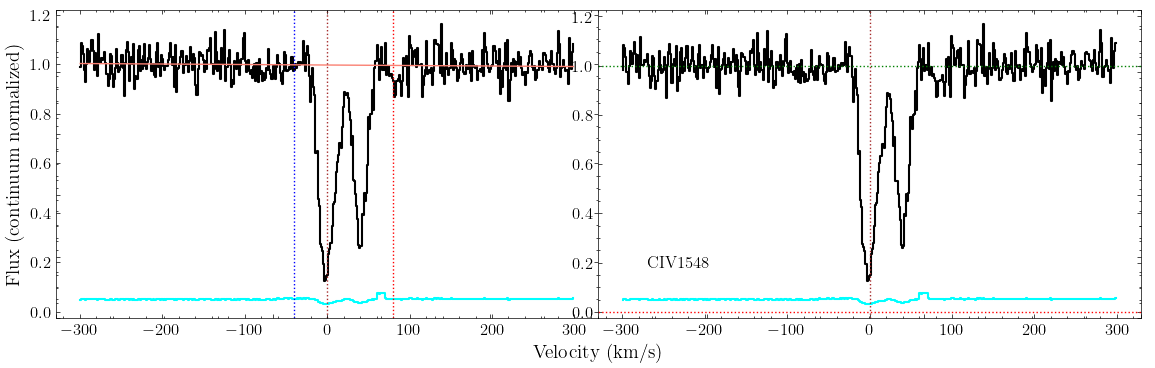

In [151]:
fig, ax = civ_1548_hires.plot_ion_transition_spec_cont()

In [152]:
civ_1548_hires.grab_ion_transition_lsf(lsf_fits_list)

In [153]:
civ_1548_hires.init_ion_transition(init_values = np.array([[13.61, 10, 0],[13.42, 10, 39]]), 
                             lsf_convolve = True)

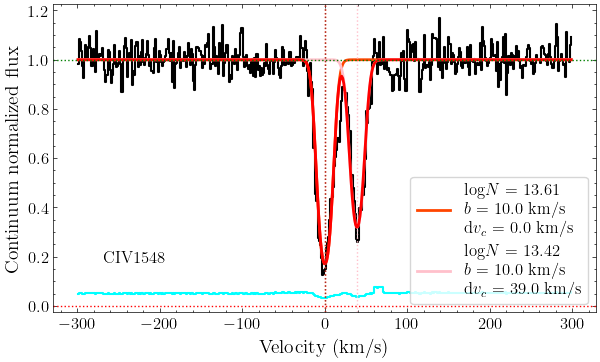

In [154]:
fig, ax = civ_1548_hires.plot_ion_transition_init_fit()

In [155]:
civ_1548_hires.fit_ion_transition()

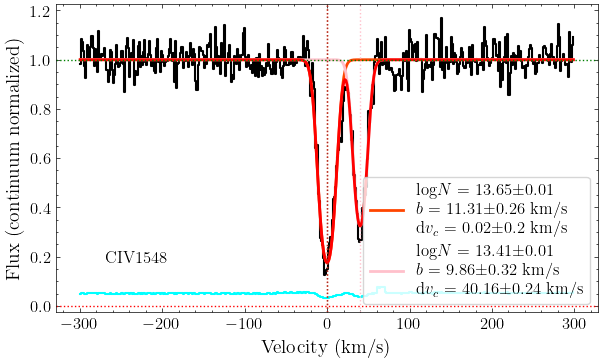

In [157]:
fig, ax = civ_1548_hires.plot_ion_transition_best_fit()

### CIV 1550 (HIRES)

In [158]:
civ_1550_hires = ion_transition('CIV', 1550, 'C', z_sys, 'HIRES')

In [159]:
civ_1550_hires.grab_ion_transition_info()
#civ_1550_hires.grab_ion_transition_info(delta_v=7)

In [160]:
civ_1550_hires.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-280]])#, delta_wav=0)

In [161]:
civ_1550_hires.cont_norm_flux(v_abs_range=[-30,70], degree=1)

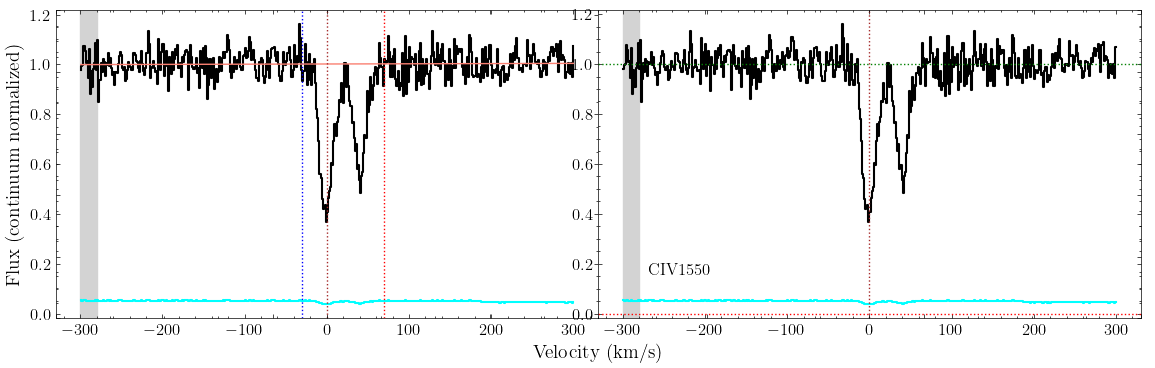

In [162]:
fig, ax = civ_1550_hires.plot_ion_transition_spec_cont()

In [163]:
civ_1550_hires.grab_ion_transition_lsf(lsf_fits_list)

In [164]:
civ_1550_hires.init_ion_transition(init_values = np.array([[13.61, 10, 0],[13.42, 10, 39]]), 
                             lsf_convolve = True)

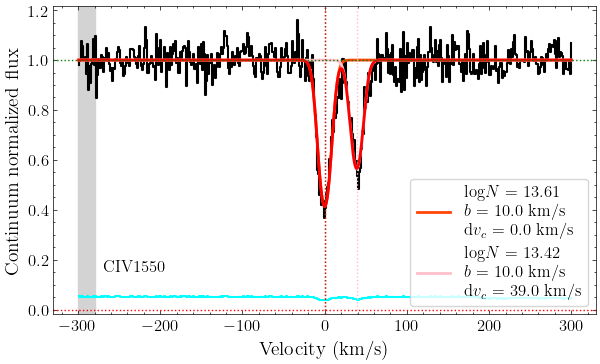

In [165]:
fig, ax = civ_1550_hires.plot_ion_transition_init_fit()

In [166]:
civ_1550_hires.fit_ion_transition()

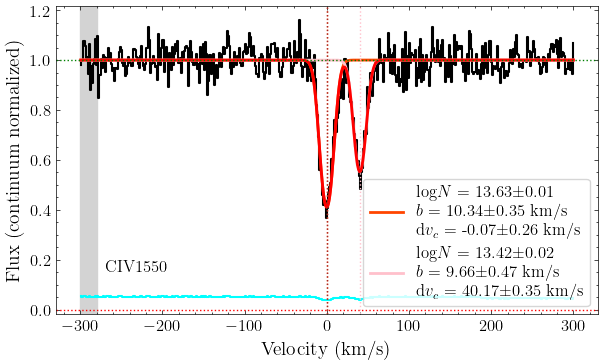

In [167]:
fig, ax = civ_1550_hires.plot_ion_transition_best_fit()

### CIV ion

In [29]:
civ = ion(z_sys, 'CIV', [civ_1548_hires, civ_1550_hires])

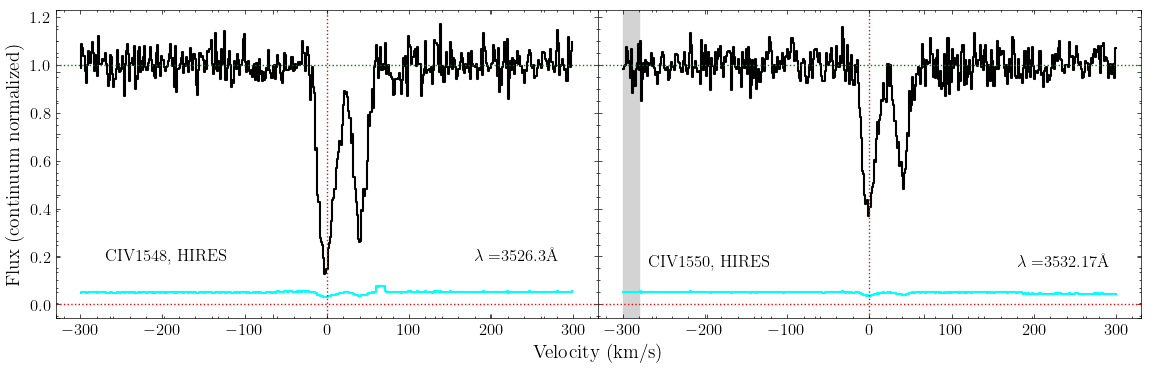

In [30]:
fig, axes = civ.plot_ion()

In [31]:
civ.init_ion([civ_1548_hires.best_values, civ_1548_hires.best_values])
#ciii.init_ion(np.array([[13.42,16,-1.15]]))

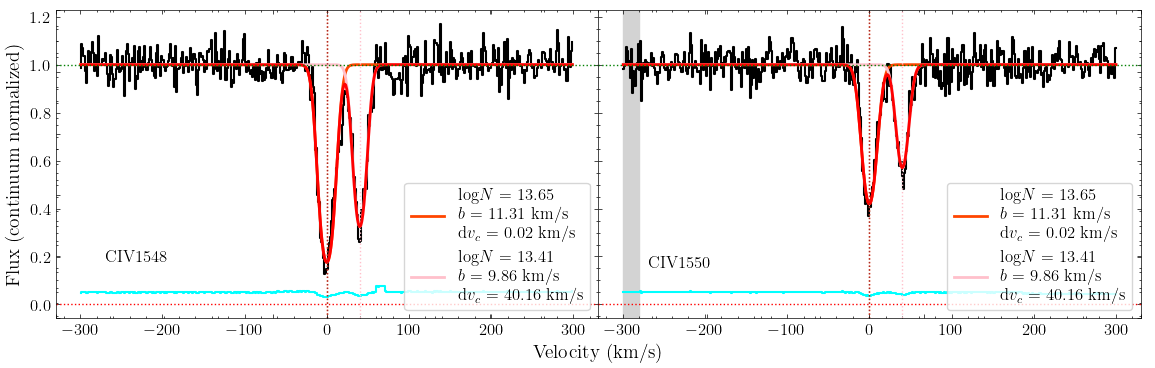

In [32]:
fig, axes = civ.plot_ion_init_fit()

In [33]:
civ.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                               ['it1c2_logN', 'it2c2_logN'],
                               ['it1c2_b', 'it2c2_b'],
                               ['it1c2_dv_c', 'it2c2_dv_c']
                              ])

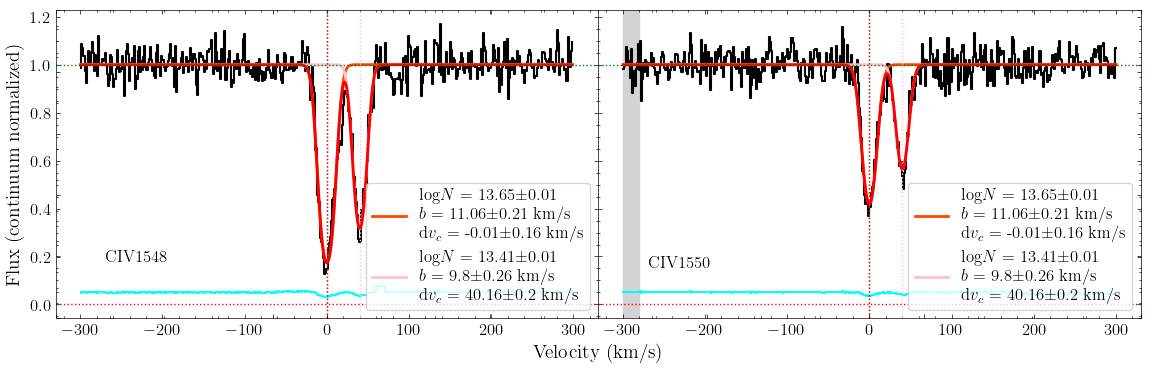

In [34]:
fig, axes = civ.plot_ion_best_fit()

## OIV

### OIV 554 (FUV)

In [168]:
oiv_554_fuv = ion_transition('OIV', 554, 'O', z_sys, 'FUV')

In [169]:
oiv_554_fuv.grab_ion_transition_info()

In [170]:
oiv_554_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-120]])#, delta_wav=0)

In [171]:
oiv_554_fuv.cont_norm_flux(v_abs_range=[-70,110], degree=1)

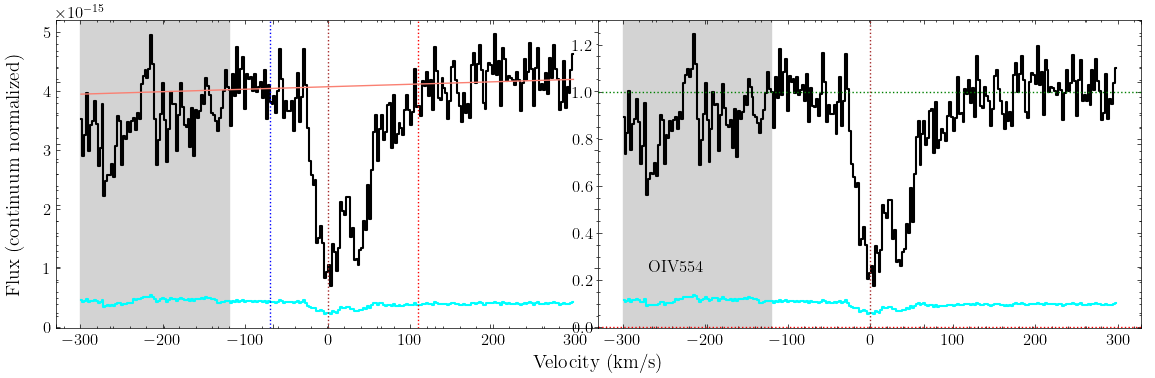

In [172]:
fig, ax = oiv_554_fuv.plot_ion_transition_spec_cont()

In [173]:
oiv_554_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [174]:
oiv_554_fuv.init_ion_transition(init_values = np.array([[14.4, 7, 0], 
                                                     [14.2, 7, 37]]), 
                             lsf_convolve = True)

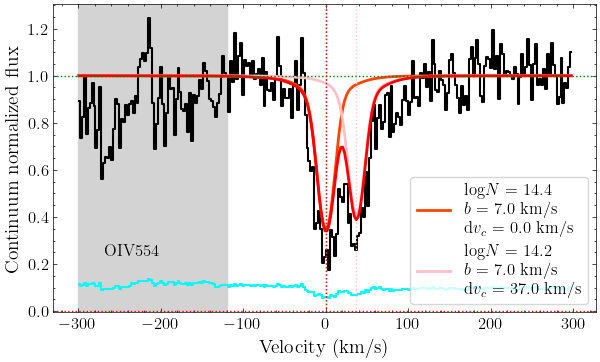

In [175]:
fig, ax = oiv_554_fuv.plot_ion_transition_init_fit()

In [176]:
oiv_554_fuv.fit_ion_transition()

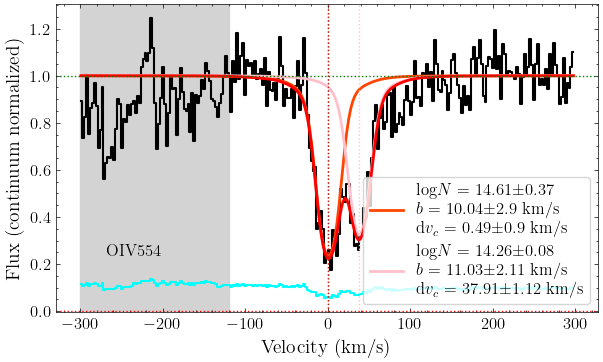

In [177]:
fig, ax = oiv_554_fuv.plot_ion_transition_best_fit()

In [179]:
#delta_wav_1 = (-3.45/3e+5)*oiv_554_fuv.wav0_obs

In [180]:
#delta_wav_1

### OIV 608 (FUV)

In [181]:
oiv_608_fuv = ion_transition('OIV', 608, 'O', z_sys, 'FUV')

In [183]:
oiv_608_fuv.grab_ion_transition_info()

In [184]:
oiv_608_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-230,-120]])#, delta_wav=0)

In [185]:
oiv_608_fuv.cont_norm_flux(v_abs_range=[-90,150], degree=1)

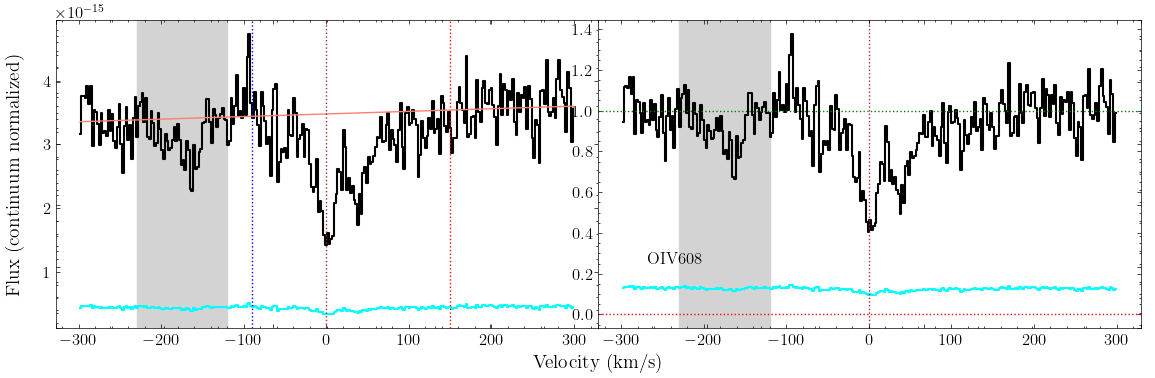

In [186]:
fig, ax = oiv_608_fuv.plot_ion_transition_spec_cont()

In [187]:
oiv_608_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [188]:
oiv_608_fuv.init_ion_transition(init_values = np.array([[14.4, 7, 0], 
                                                     [14.2, 7, 37]]), 
                             lsf_convolve = True)

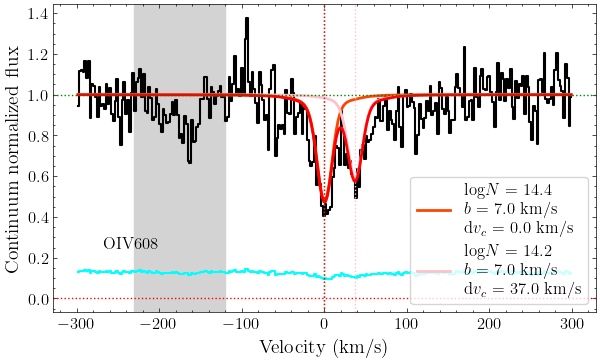

In [189]:
fig, ax = oiv_608_fuv.plot_ion_transition_init_fit()

In [190]:
oiv_608_fuv.fit_ion_transition()

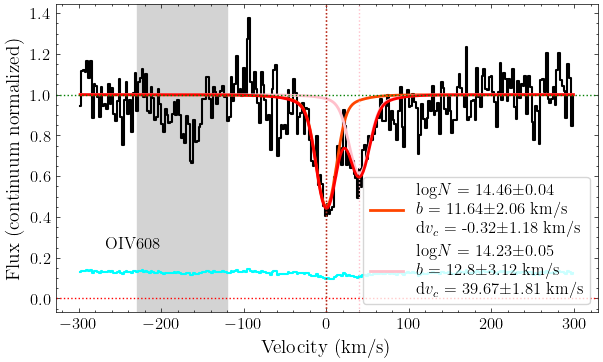

In [191]:
fig, ax = oiv_608_fuv.plot_ion_transition_best_fit()

In [192]:
#delta_wav_2 = (-3.95/3e+5)*oiv_608_fuv.wav0_obs

In [193]:
#delta_wav_2

In [194]:
#.5*(delta_wav_1+delta_wav_2)

### OIV ion

In [60]:
oiv = ion(z_sys, 'OIV', [oiv_554_fuv, oiv_608_fuv])

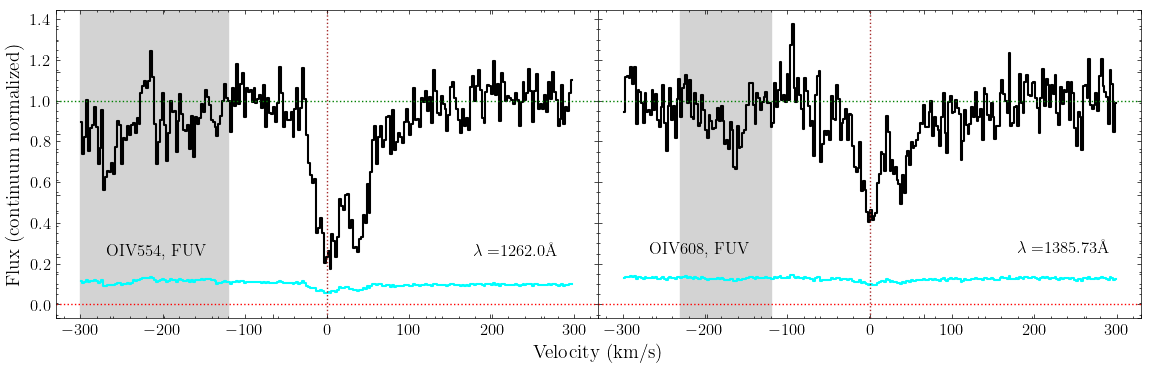

In [61]:
fig, axes = oiv.plot_ion()

In [62]:
oiv.init_ion([oiv_554_fuv.best_values, oiv_554_fuv.best_values])

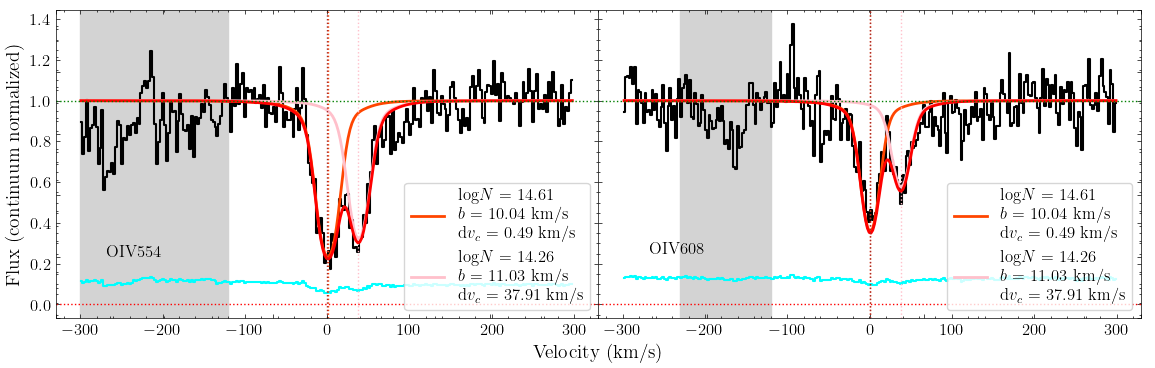

In [63]:
fig, axes = oiv.plot_ion_init_fit()

In [64]:
oiv.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                               ['it1c2_logN', 'it2c2_logN'],
                               ['it1c2_b', 'it2c2_b'],
                               ['it1c2_dv_c', 'it2c2_dv_c']])

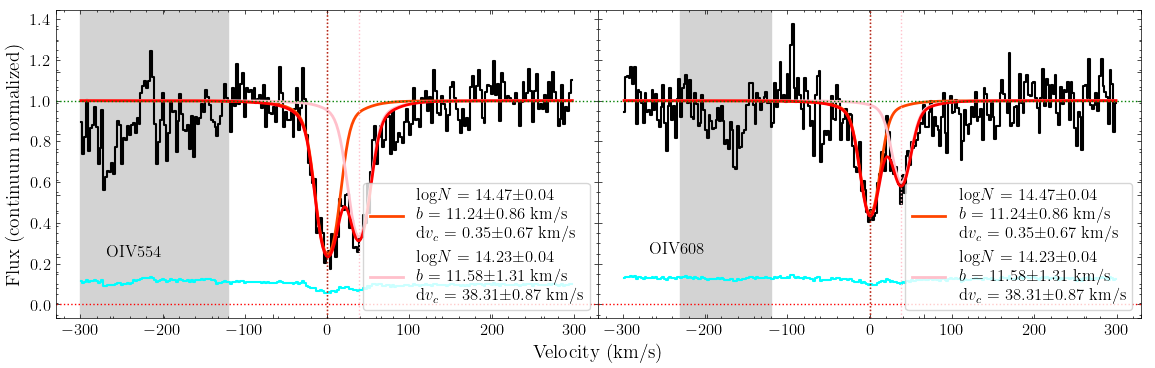

In [65]:
fig, axes = oiv.plot_ion_best_fit()

## Ion suite

In [66]:
civ_oiv = ion_suite(z_sys, 'CIV+OIV', [civ, oiv])

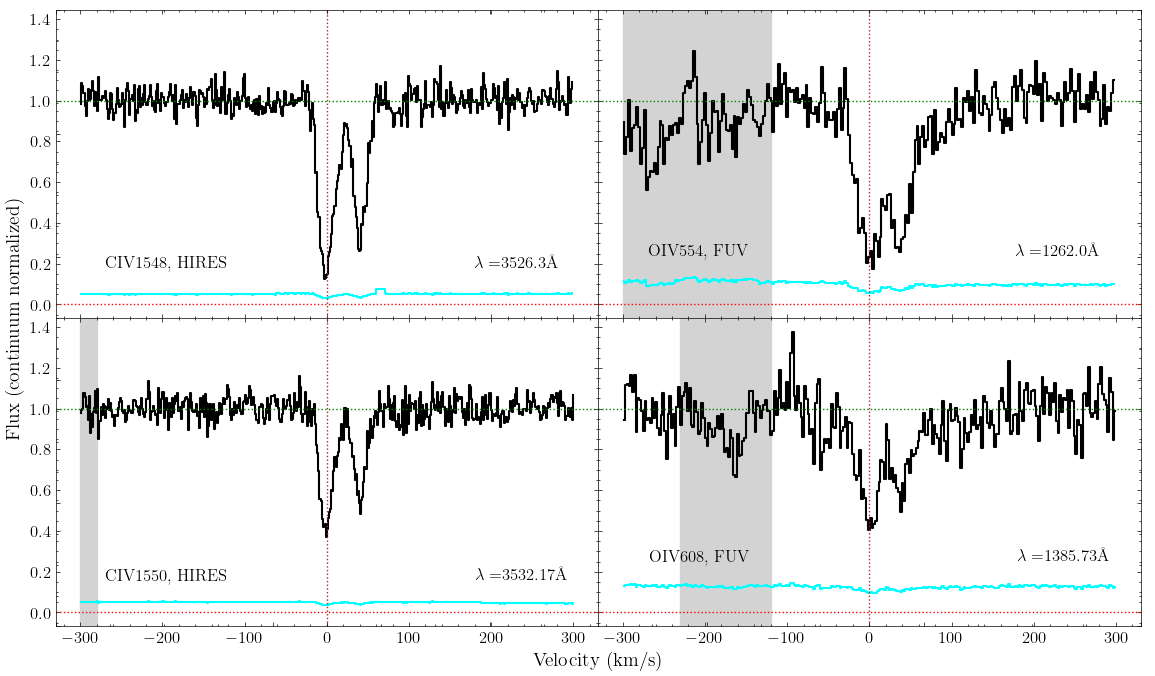

In [67]:
fig, axes = civ_oiv.plot_ion_suite(n_cols=2)

# MW

In [68]:
z_mw = -1.3e-4

## CaII 3969 (HIRES)

In [69]:
caii_3969_hires = ion_transition('CaII', 3969, 'Ca', z_mw, 'HIRES')

In [70]:
caii_3969_hires.grab_ion_transition_info()

In [71]:
caii_3969_hires.grab_ion_transition_spec(spec_fits_list)

In [72]:
caii_3969_hires.cont_norm_flux(renorm=False, v_abs_range=[-80,110], degree=1)

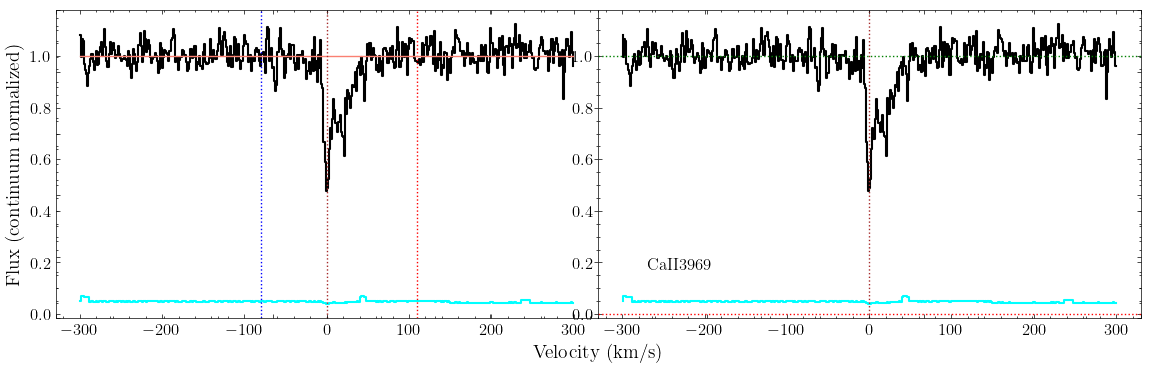

In [73]:
fig, axes = caii_3969_hires.plot_ion_transition_spec_cont()

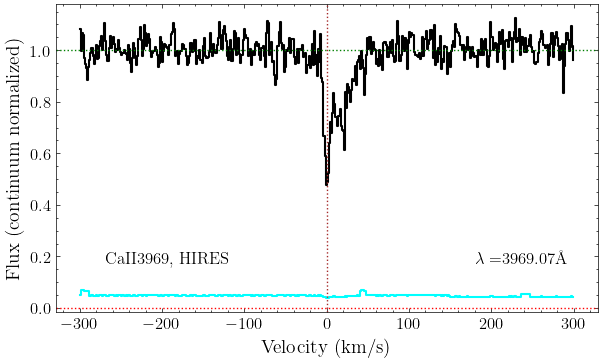

In [74]:
fig, axes = caii_3969_hires.plot_ion_transition_spec()

## CaII 3934 (HIRES)

In [75]:
caii_3934_hires = ion_transition('CaII', 3934, 'Ca', z_mw, 'HIRES')

In [76]:
caii_3934_hires.grab_ion_transition_info()

In [77]:
caii_3934_hires.grab_ion_transition_spec(spec_fits_list)

In [78]:
caii_3934_hires.cont_norm_flux(renorm=False, v_abs_range=[-80,110], degree=1)

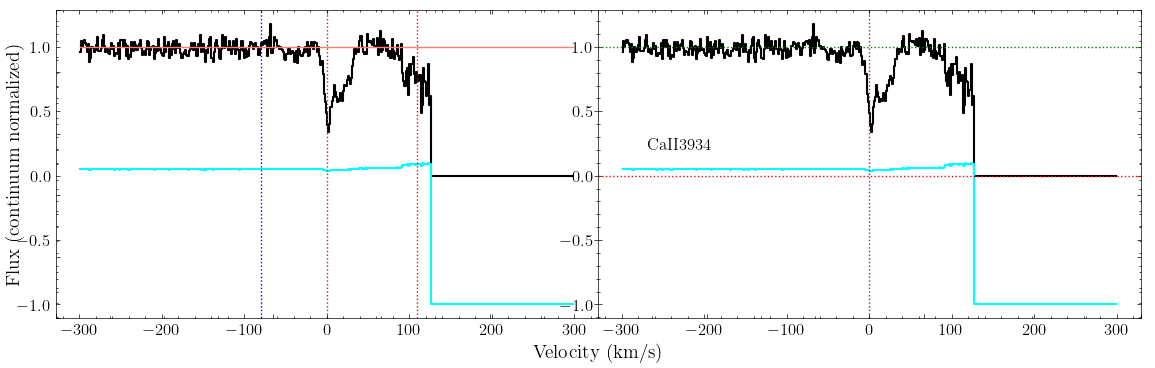

In [79]:
fig, axes = caii_3934_hires.plot_ion_transition_spec_cont()

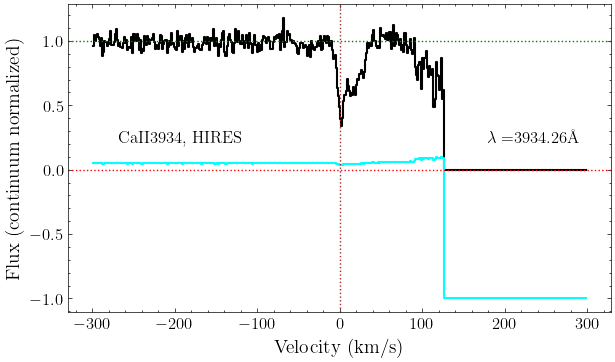

In [80]:
fig, axes = caii_3934_hires.plot_ion_transition_spec()

## CII* 1335

In [195]:
cii_1335_fuv = ion_transition('CII*', 1335, 'C', z_mw, 'FUV')

In [196]:
cii_1335_fuv.grab_ion_transition_info()

In [197]:
cii_1335_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-180]], delta_wav=0)

In [198]:
cii_1335_fuv.cont_norm_flux(renorm=True, v_abs_range=[-50,70], degree=1)

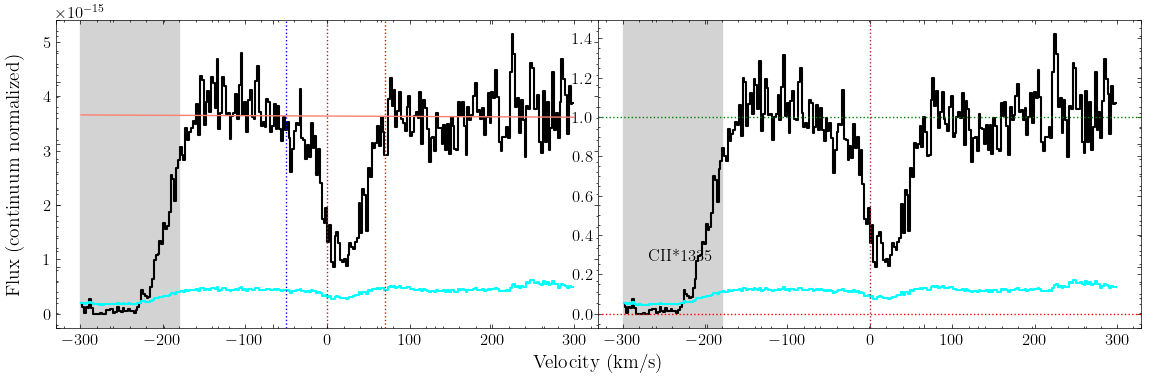

In [199]:
fig, axes = cii_1335_fuv.plot_ion_transition_spec_cont()

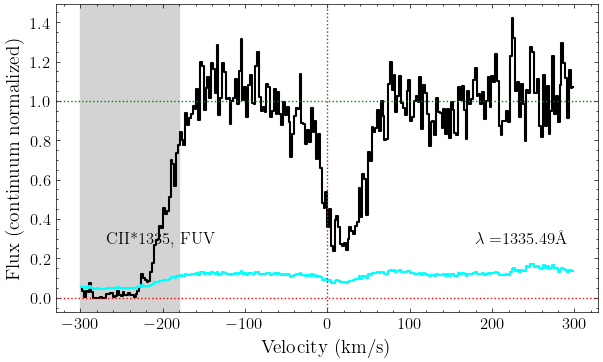

In [200]:
fig, axes = cii_1335_fuv.plot_ion_transition_spec()

## NI 1200

In [201]:
ni_1200_fuv = ion_transition('NI', 1200.71, 'N', z_mw, 'FUV')

In [202]:
ni_1200_fuv.grab_ion_transition_info()

In [203]:
ni_1200_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-230],[-170,-60]], delta_wav=0)

In [204]:
ni_1200_fuv.cont_norm_flux(renorm=True, v_abs_range=[-40,80], degree=1)

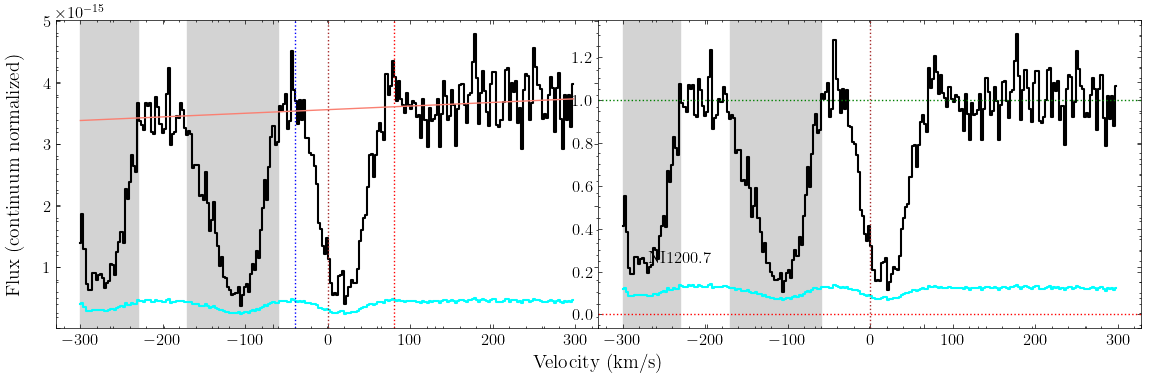

In [205]:
fig, axes = ni_1200_fuv.plot_ion_transition_spec_cont()

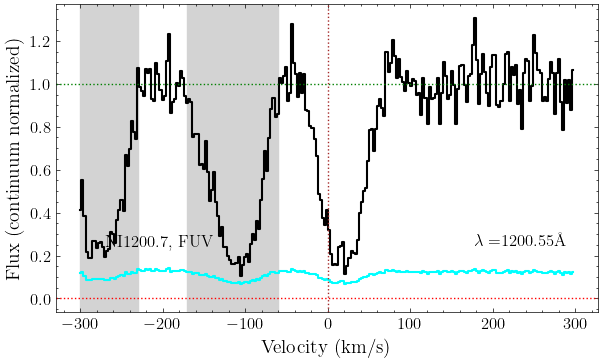

In [206]:
fig, axes = ni_1200_fuv.plot_ion_transition_spec()

# z= 1.09

In [207]:
z_sys_2 = 1.094551

## CIV

### CIV 1548 (HIRES)

In [208]:
civ_1548_hires = ion_transition('CIV', 1548, 'C', z_sys_2, 'HIRES')

In [209]:
civ_1548_hires.grab_ion_transition_info()
#civ_1548_hires.grab_ion_transition_info(delta_v=7)

In [210]:
civ_1548_hires.grab_ion_transition_spec(spec_fits_list)

In [211]:
civ_1548_hires.cont_norm_flux(v_abs_range=[-50,70], degree=1)

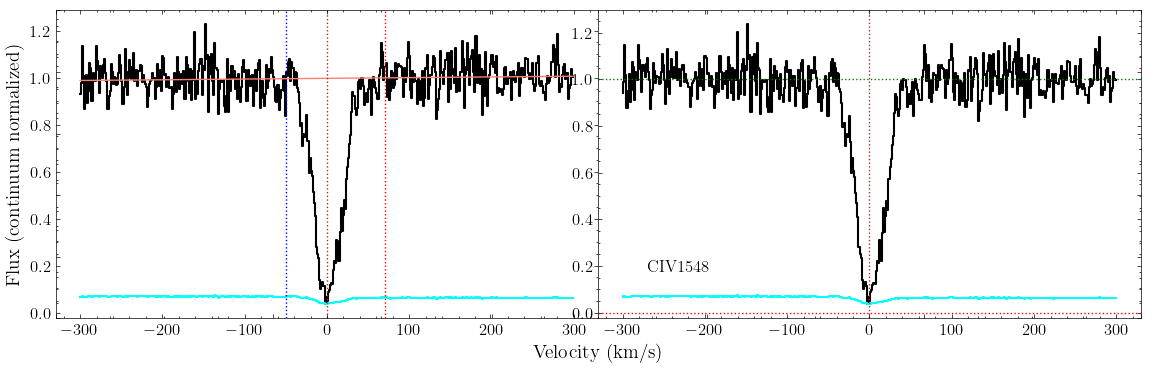

In [212]:
fig, ax = civ_1548_hires.plot_ion_transition_spec_cont()

### CIV 1550 (HIRES)

In [213]:
civ_1550_hires = ion_transition('CIV', 1550, 'C', z_sys_2, 'HIRES')

In [214]:
civ_1550_hires.grab_ion_transition_info()
#civ_1550_hires.grab_ion_transition_info(delta_v=7)

In [215]:
civ_1550_hires.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-280]])

In [216]:
civ_1550_hires.cont_norm_flux(v_abs_range=[-40,55], degree=1)

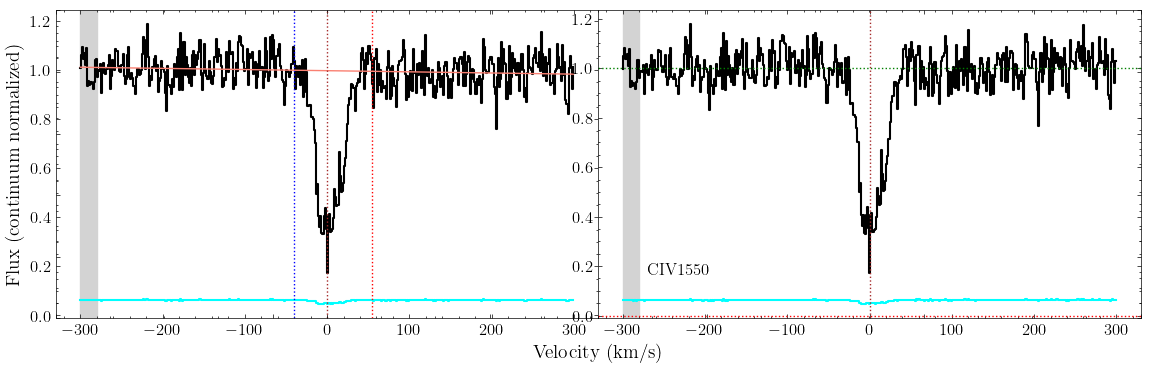

In [217]:
fig, ax = civ_1550_hires.plot_ion_transition_spec_cont()

### CIV ion

In [218]:
civ = ion(z_sys, 'CIV', [civ_1548_hires, civ_1550_hires])

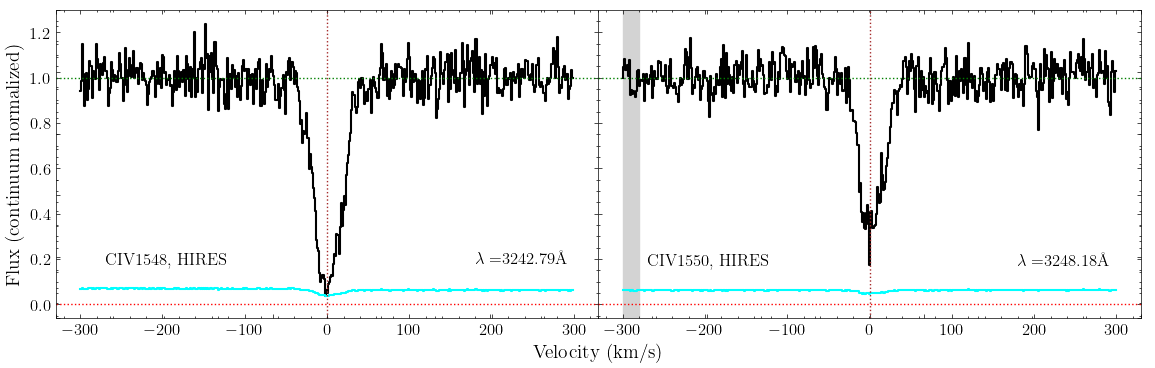

In [219]:
fig, axes = civ.plot_ion()

## OIII

### OIII 702 (FUV)

In [237]:
oiii_702_fuv = ion_transition('OIII', 702, 'O', z_sys_2, 'FUV')

In [238]:
oiii_702_fuv.grab_ion_transition_info()

In [239]:
oiii_702_fuv.grab_ion_transition_spec(spec_fits_list)#, delta_wav=0)

In [240]:
oiii_702_fuv.cont_norm_flux(v_abs_range=[-55,55], degree=1)

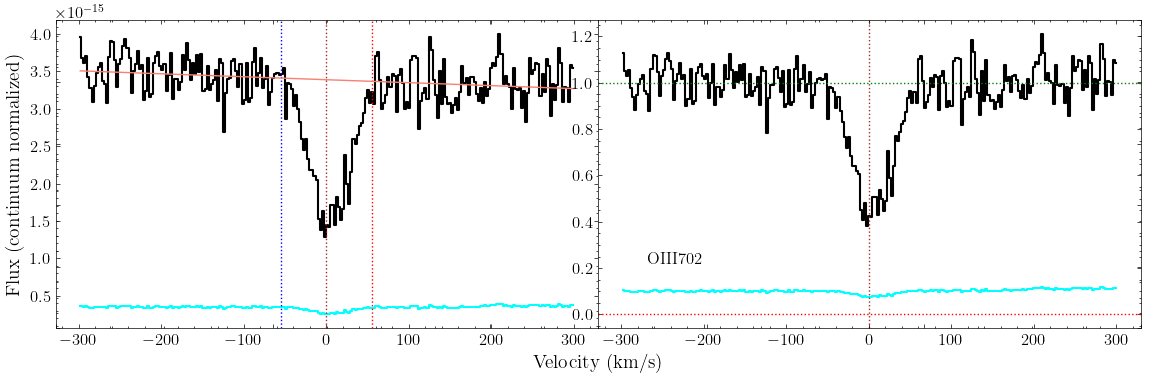

In [241]:
fig, ax = oiii_702_fuv.plot_ion_transition_spec_cont()

### OIII ion

In [242]:
oiii = ion(z_sys_2, 'OIII', [oiii_702_fuv])

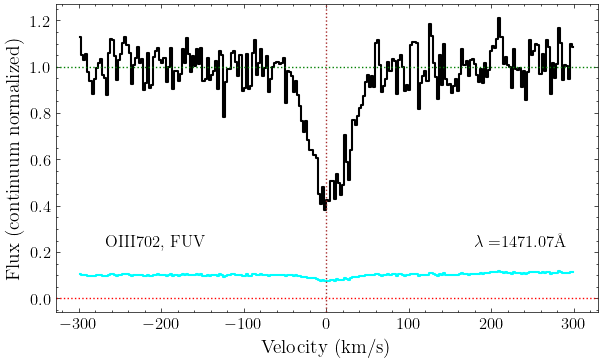

In [243]:
fig, axes = oiii.plot_ion()

## OIV

### OIV 787 (FUV)

In [244]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys_2, 'FUV')

In [245]:
oiv_787_fuv.grab_ion_transition_info()
#oiv_787_fuv.grab_ion_transition_info()

In [246]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list)#, delta_wav=0)

In [247]:
oiv_787_fuv.cont_norm_flux(v_abs_range=[-55,80], degree=1)

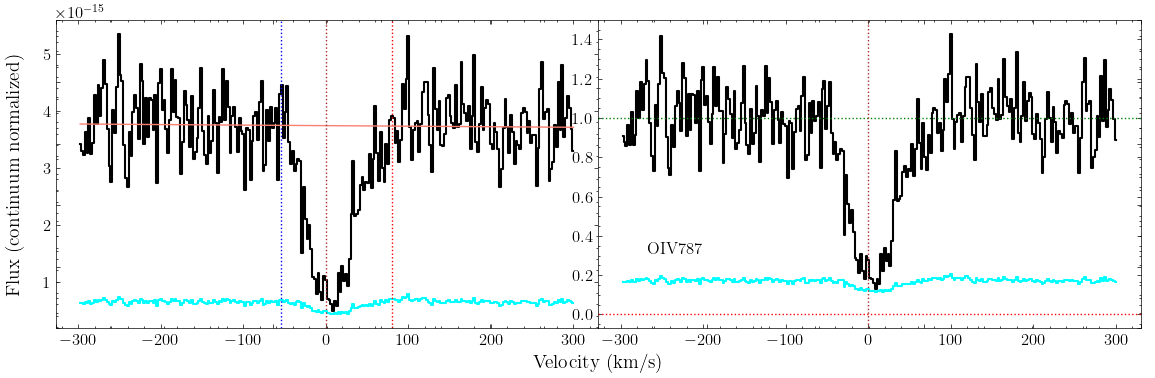

In [248]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

### OIV ion

In [249]:
oiv = ion(z_sys_2, 'OIV', [oiv_787_fuv])

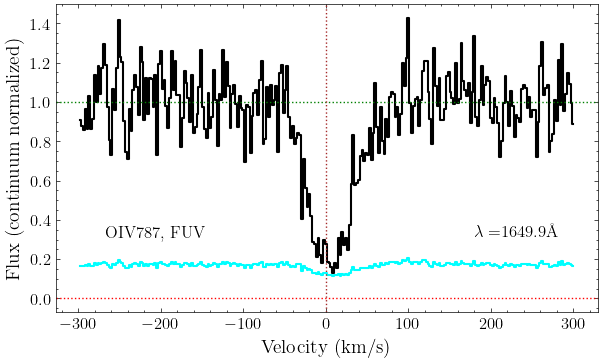

In [250]:
fig, axes = oiv.plot_ion()

## Ion suite

In [251]:
civ_oiii_oiv = ion_suite(z_sys_2, 'CIV+OIII+OIV', [civ, oiii, oiv])

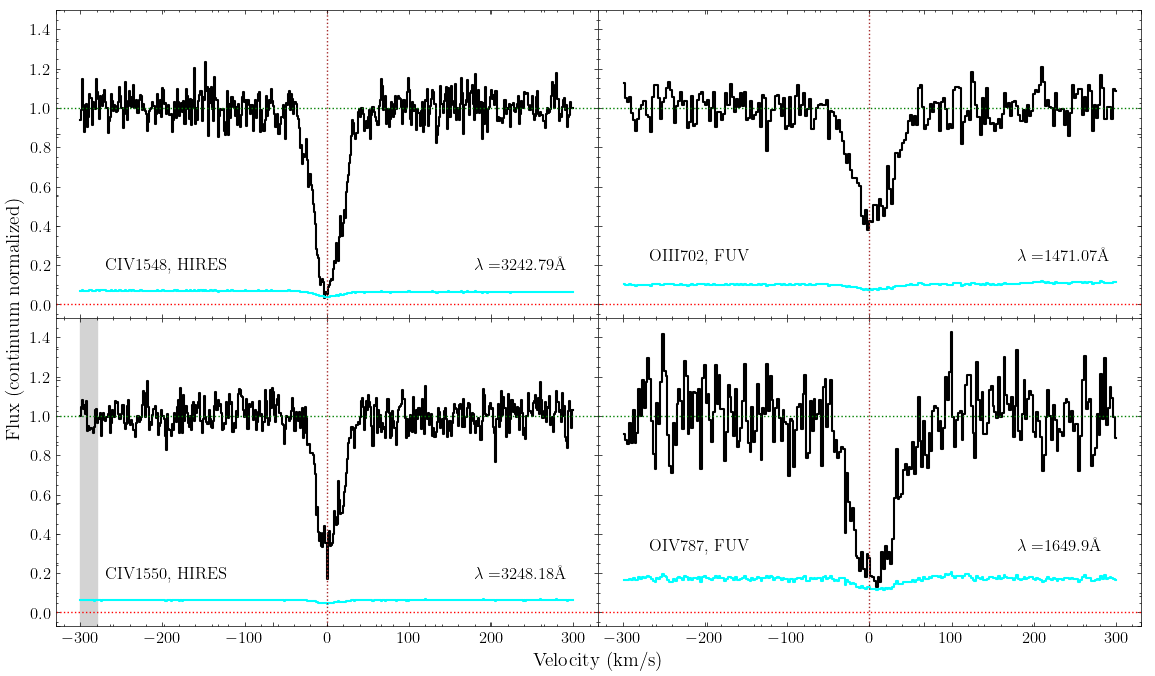

In [252]:
fig, axes = civ_oiii_oiv.plot_ion_suite(n_cols=2)

# z= 1.16

In [254]:
z_sys_3 = 1.1658994

## CIV

### CIV 1548 (HIRES)

In [255]:
civ_1548_hires = ion_transition('CIV', 1548, 'C', z_sys_3, 'HIRES')

In [256]:
civ_1548_hires.grab_ion_transition_info()
#civ_1548_hires.grab_ion_transition_info(delta_v=7)

In [257]:
civ_1548_hires.grab_ion_transition_spec(spec_fits_list)

In [258]:
civ_1548_hires.cont_norm_flux(v_abs_range=[-50,70], degree=1)

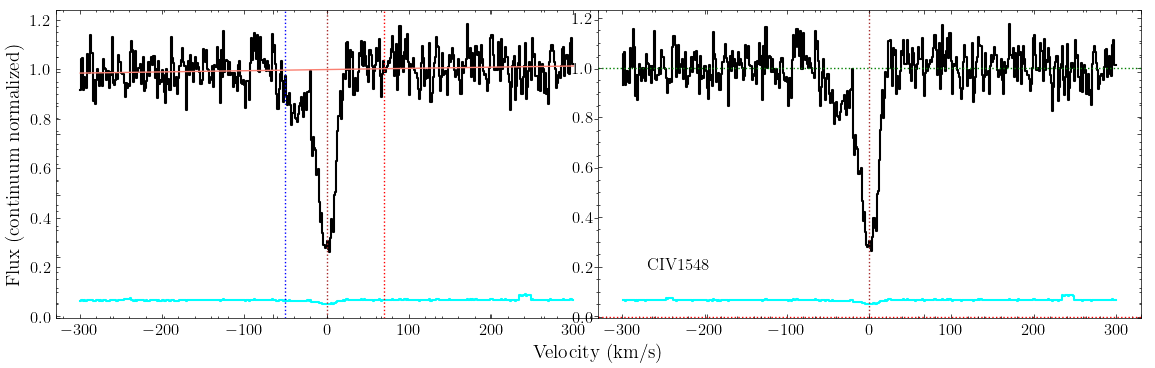

In [259]:
fig, ax = civ_1548_hires.plot_ion_transition_spec_cont()

### CIV 1550 (HIRES)

In [260]:
civ_1550_hires = ion_transition('CIV', 1550, 'C', z_sys_3, 'HIRES')

In [261]:
civ_1550_hires.grab_ion_transition_info()
#civ_1550_hires.grab_ion_transition_info(delta_v=7)

In [262]:
civ_1550_hires.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-280]])

In [263]:
civ_1550_hires.cont_norm_flux(v_abs_range=[-40,55], degree=1)

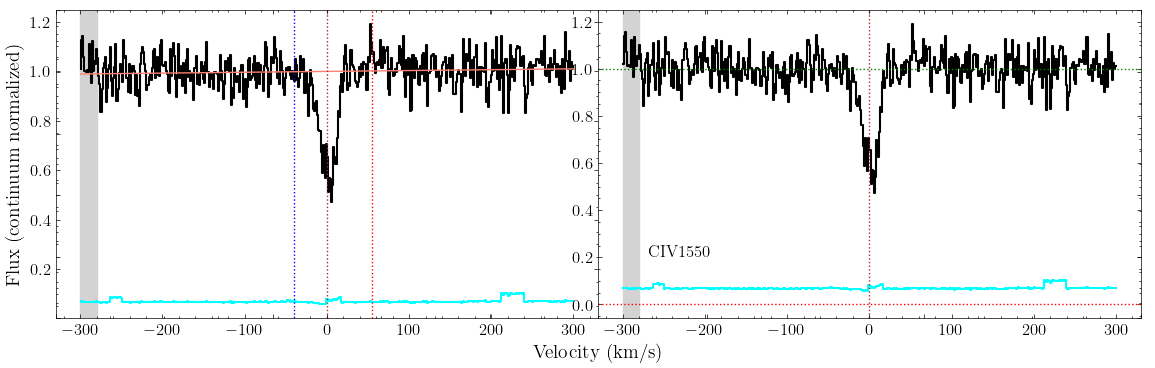

In [264]:
fig, ax = civ_1550_hires.plot_ion_transition_spec_cont()

### CIV ion

In [265]:
civ = ion(z_sys, 'CIV', [civ_1548_hires, civ_1550_hires])

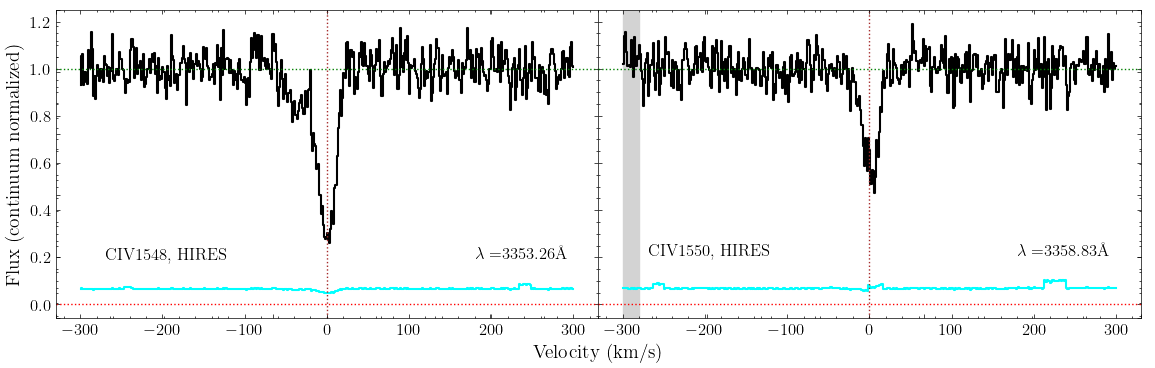

In [266]:
fig, axes = civ.plot_ion()

## OIII

### OIII 702 (FUV)

In [352]:
oiii_702_fuv = ion_transition('OIII', 702, 'O', z_sys_3, 'FUV')

In [353]:
oiii_702_fuv.grab_ion_transition_info()

In [354]:
oiii_702_fuv.grab_ion_transition_spec(spec_fits_list)#, delta_wav=0)

In [355]:
oiii_702_fuv.cont_norm_flux(v_abs_range=[-60,50], degree=1)

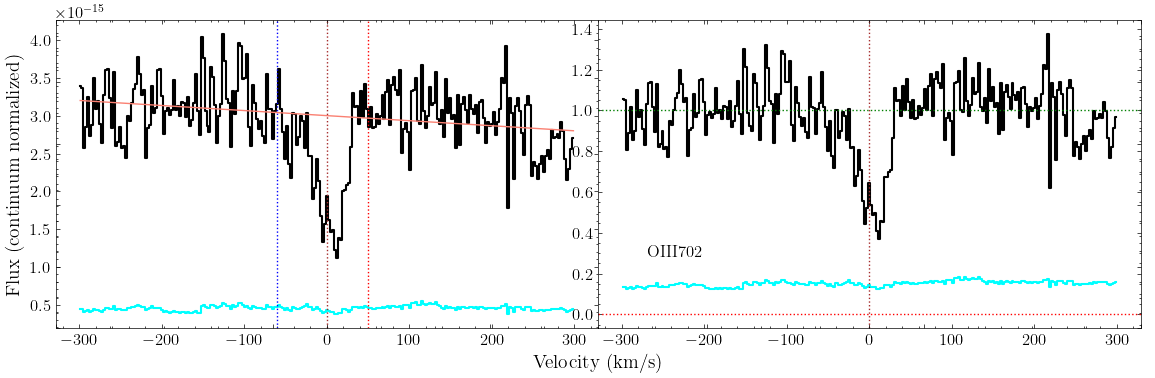

In [356]:
fig, ax = oiii_702_fuv.plot_ion_transition_spec_cont()

### OIII ion

In [357]:
oiii = ion(z_sys_3, 'OIII', [oiii_702_fuv])

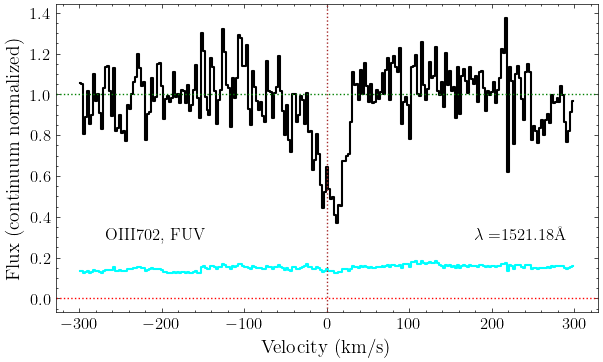

In [358]:
fig, axes = oiii.plot_ion()

## OIV

### OIV 553 (FUV)

In [359]:
oiv_553_fuv = ion_transition('OIV', 553, 'O', z_sys_3, 'FUV')

In [360]:
oiv_553_fuv.grab_ion_transition_info()

In [361]:
oiv_553_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[180,300]])#, delta_wav=0)

In [362]:
oiv_553_fuv.cont_norm_flux(v_abs_range=[-70,110], degree=1)

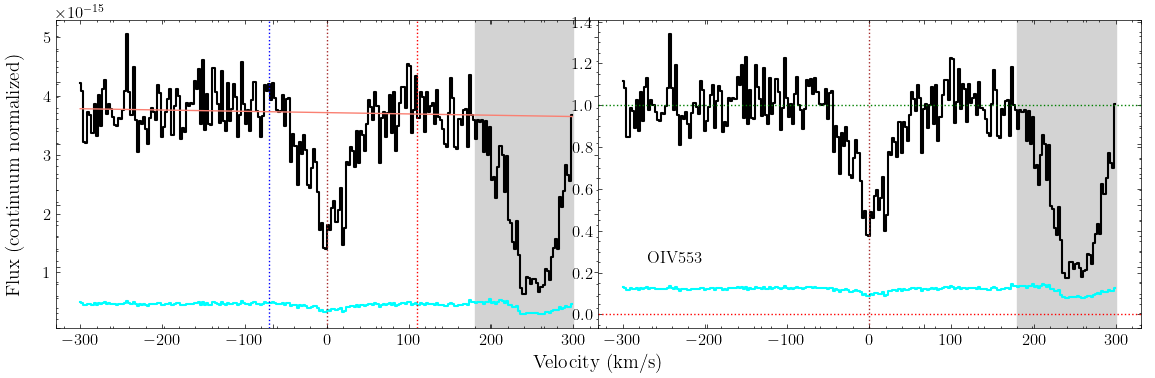

In [363]:
fig, ax = oiv_553_fuv.plot_ion_transition_spec_cont()

### OIV 608 (FUV)

In [364]:
oiv_608_fuv = ion_transition('OIV', 608, 'O', z_sys_3, 'FUV')

In [365]:
oiv_608_fuv.grab_ion_transition_info()

In [366]:
oiv_608_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-180,-125],[200,300]])#, delta_wav=0)

In [367]:
oiv_608_fuv.cont_norm_flux(v_abs_range=[-70,110], degree=1)

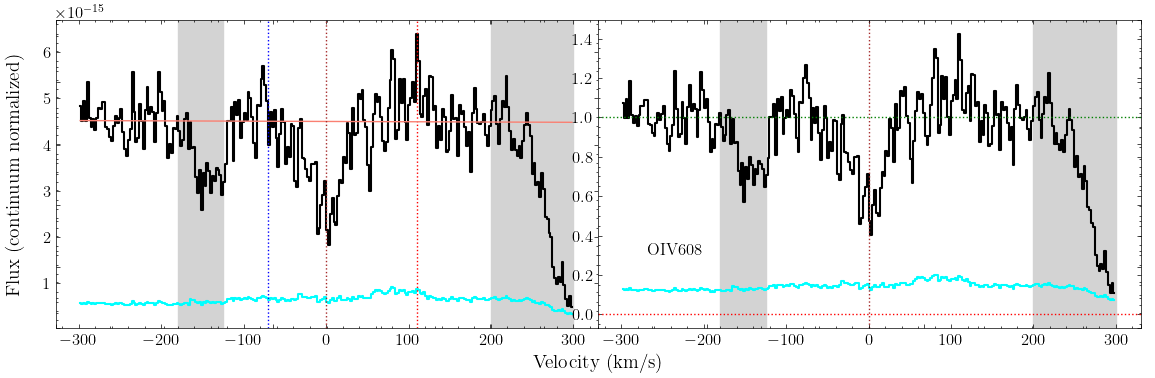

In [368]:
fig, ax = oiv_608_fuv.plot_ion_transition_spec_cont()

### OIV 787 (FUV)

In [369]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys_3, 'FUV')

In [370]:
oiv_787_fuv.grab_ion_transition_info()
#oiv_787_fuv.grab_ion_transition_info()

In [371]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-150,-110],[155,200]])#, delta_wav=0)

In [372]:
oiv_787_fuv.cont_norm_flux(v_abs_range=[-65,80], degree=1)

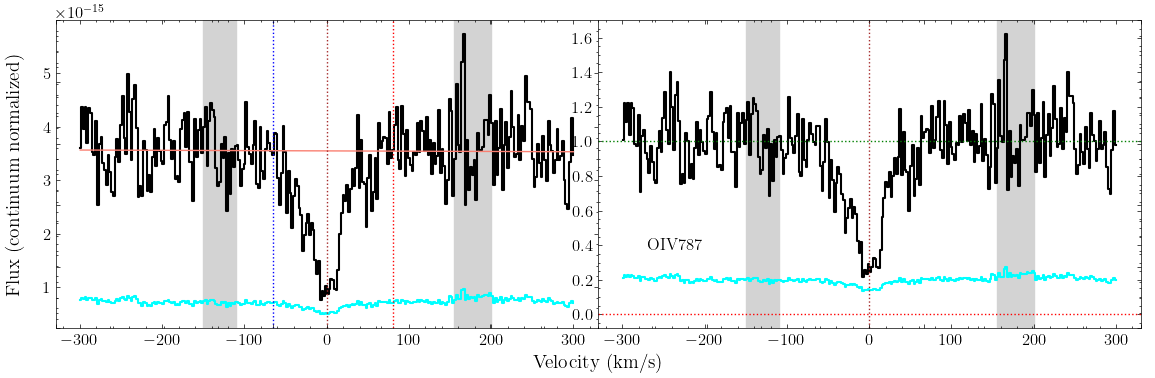

In [373]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

### OIV ion

In [374]:
oiv = ion(z_sys_3, 'OIV', [oiv_553_fuv, oiv_608_fuv, oiv_787_fuv])

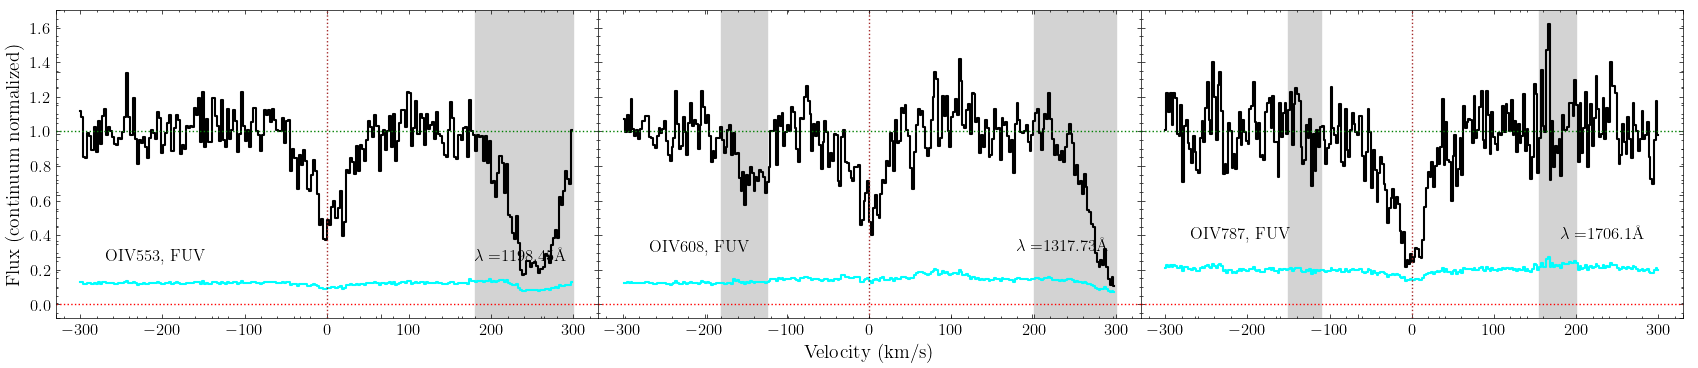

In [375]:
fig, axes = oiv.plot_ion(n_cols=3)

## Ion suite

In [376]:
civ_oiii_oiv = ion_suite(z_sys_3, 'CIV+OIII+OIV', [civ, oiii, oiv])

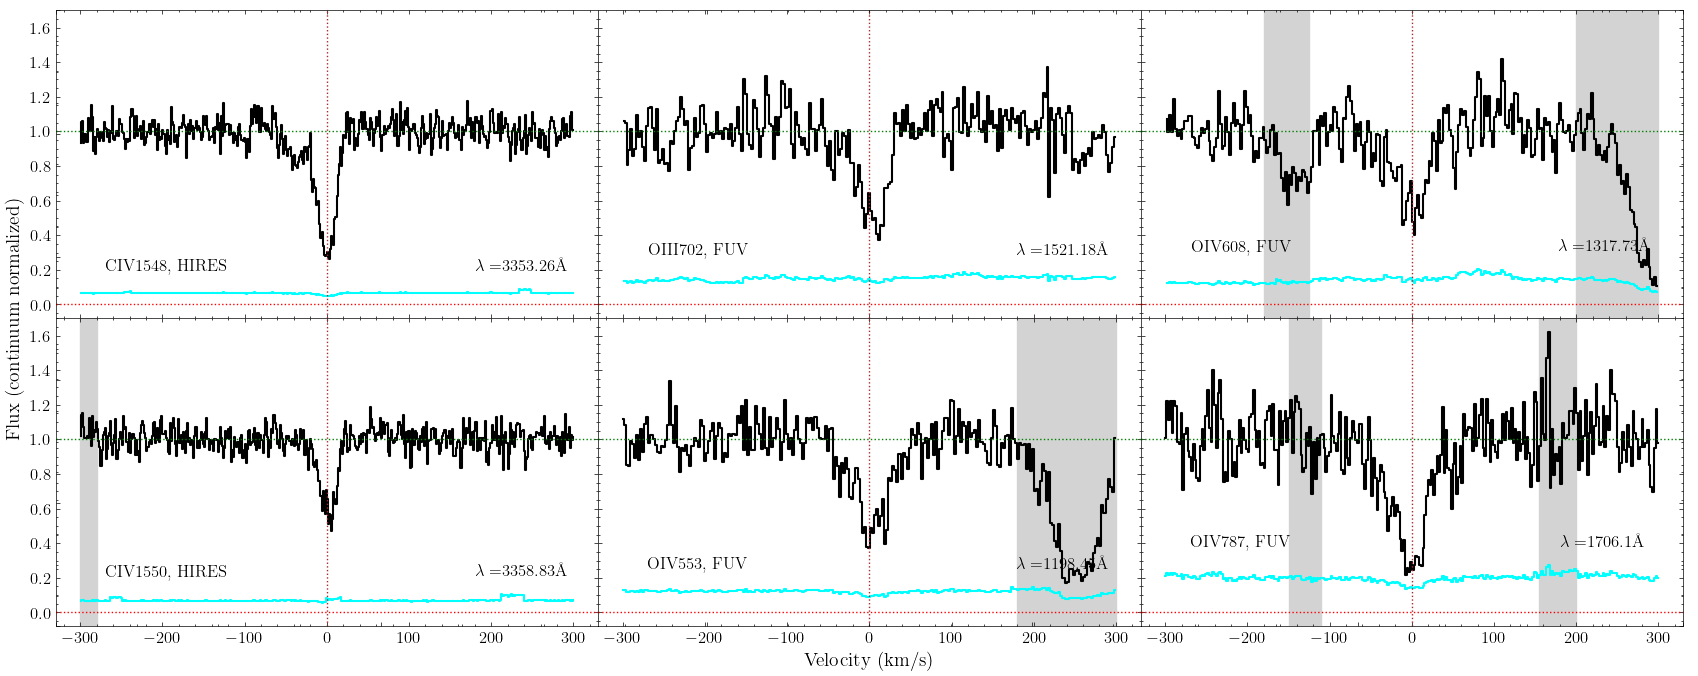

In [377]:
fig, axes = civ_oiii_oiv.plot_ion_suite(n_cols=3)

# z= 1.04

In [378]:
z_sys_4 = 1.04429485

## CIV

### CIV 1548 (HIRES)

In [379]:
civ_1548_hires = ion_transition('CIV', 1548, 'C', z_sys_4, 'HIRES')

In [380]:
civ_1548_hires.grab_ion_transition_info()
#civ_1548_hires.grab_ion_transition_info(delta_v=7)

In [382]:
civ_1548_hires.grab_ion_transition_spec(spec_fits_list, delta_wav=0)

In [391]:
civ_1548_hires.cont_norm_flux(v_abs_range=[-40,140],  degree=1)

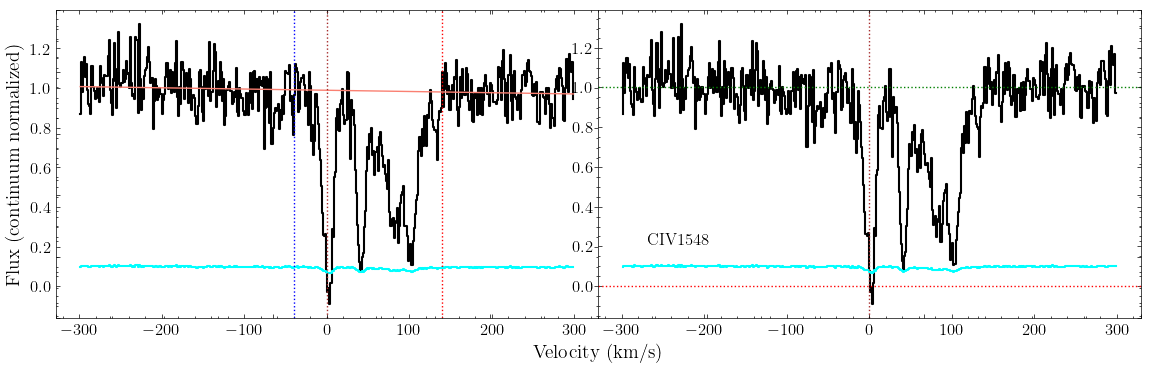

In [392]:
fig, ax = civ_1548_hires.plot_ion_transition_spec_cont()

### CIV 1550 (HIRES)

In [393]:
civ_1550_hires = ion_transition('CIV', 1550, 'C', z_sys_4, 'HIRES')

In [394]:
civ_1550_hires.grab_ion_transition_info()
#civ_1550_hires.grab_ion_transition_info(delta_v=7)

In [395]:
civ_1550_hires.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-280]], delta_wav=0)

In [396]:
civ_1550_hires.cont_norm_flux(v_abs_range=[-40,170], degree=1)

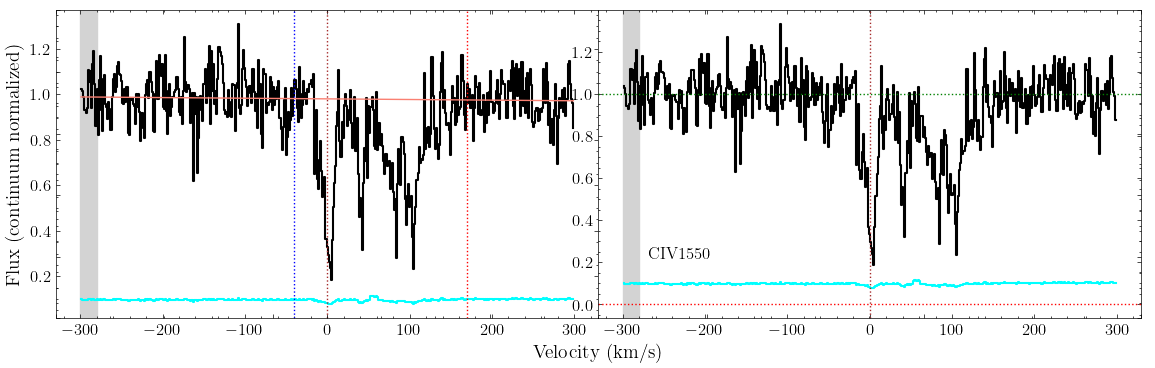

In [397]:
fig, ax = civ_1550_hires.plot_ion_transition_spec_cont()

### CIV ion

In [398]:
civ = ion(z_sys_4, 'CIV', [civ_1548_hires, civ_1550_hires])

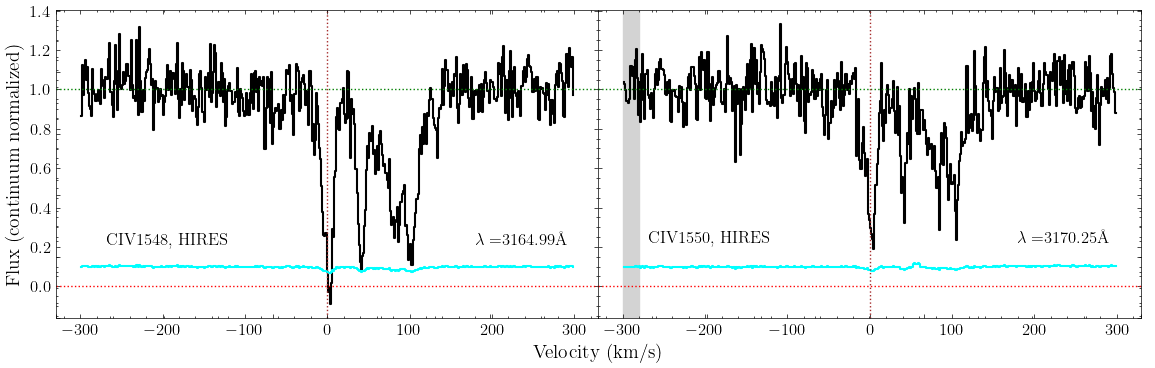

In [399]:
fig, axes = civ.plot_ion()

## OIII

### OIII 832 (FUV)

In [415]:
oiii_832_fuv = ion_transition('OIII', 832, 'O', z_sys_4, 'FUV')

In [416]:
oiii_832_fuv.grab_ion_transition_info()

In [436]:
oiii_832_fuv.grab_ion_transition_spec(spec_fits_list)

In [437]:
oiii_832_fuv.cont_norm_flux(v_abs_range=[-40,170], degree=1)

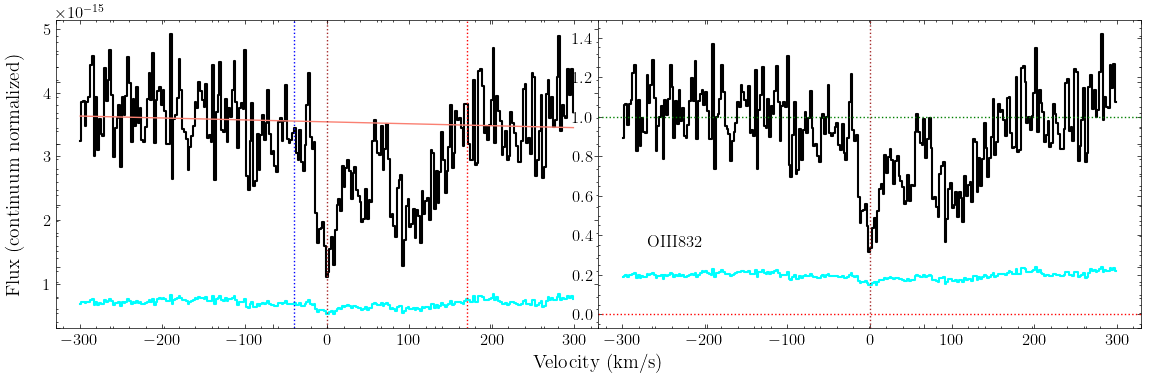

In [438]:
fig, ax = oiii_832_fuv.plot_ion_transition_spec_cont()

### OIII ion

In [439]:
oiii = ion(z_sys_4, 'OIII', [oiii_832_fuv])

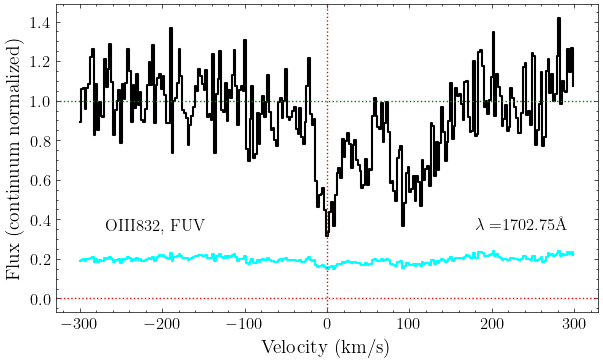

In [440]:
fig, axes = oiii.plot_ion()

## OIV

### OIV 608 (FUV)

In [441]:
oiv_608_fuv = ion_transition('OIV', 608, 'O', z_sys_4, 'FUV')

In [442]:
oiv_608_fuv.grab_ion_transition_info()

In [443]:
oiv_608_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-150]])

In [444]:
oiv_608_fuv.cont_norm_flux(v_abs_range=[-50,140], degree=1)

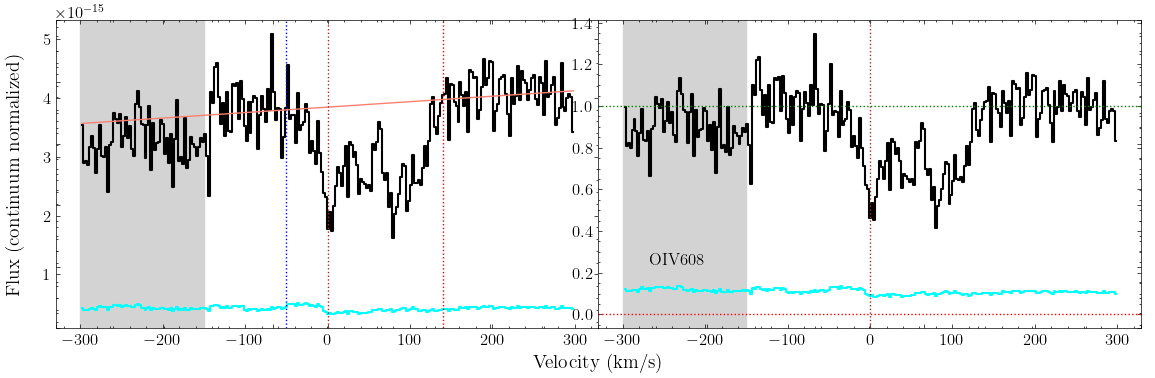

In [445]:
fig, ax = oiv_608_fuv.plot_ion_transition_spec_cont()

### OIV 787 (FUV)

In [446]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys_4, 'FUV')

In [447]:
oiv_787_fuv.grab_ion_transition_info()
#oiv_787_fuv.grab_ion_transition_info()

In [448]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-150]])

In [449]:
oiv_787_fuv.cont_norm_flux(v_abs_range=[-70,160], degree=1)

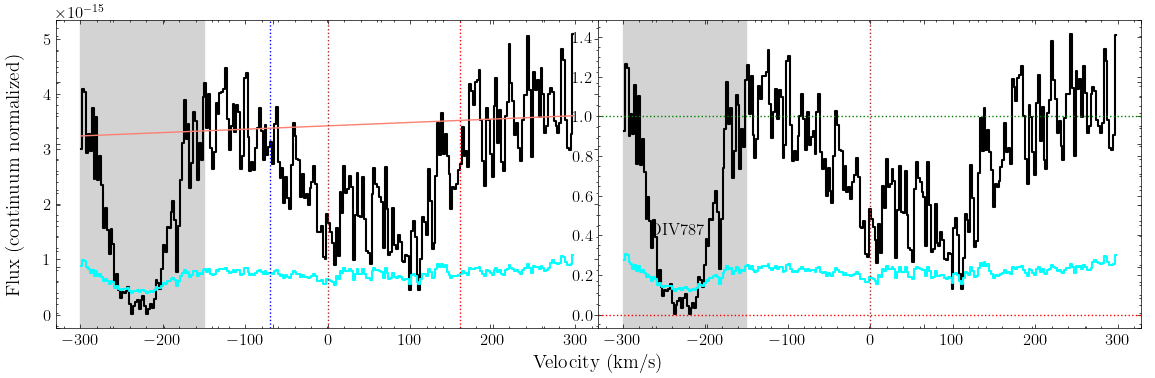

In [450]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

### OIV ion

In [451]:
oiv = ion(z_sys_4, 'OIV', [oiv_608_fuv, oiv_787_fuv])

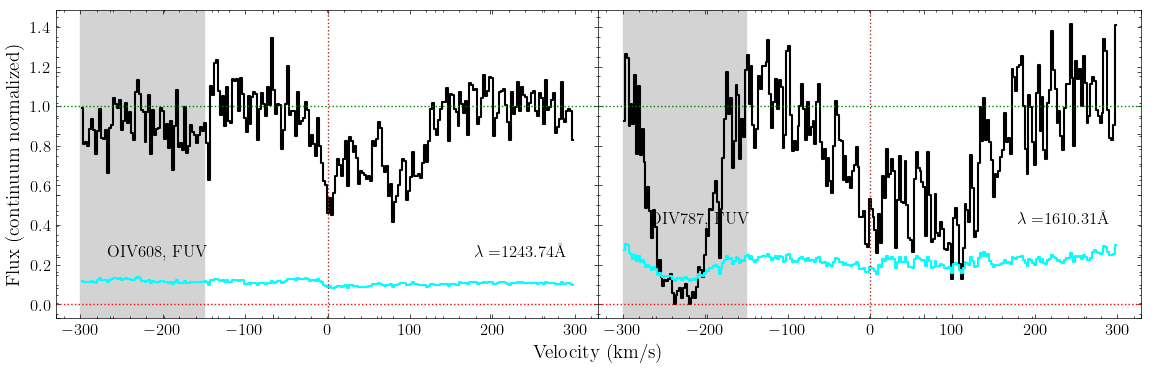

In [452]:
fig, axes = oiv.plot_ion(n_cols=2)

## Ion suite

In [453]:
civ_oiii_oiv = ion_suite(z_sys_4, 'CIV+OIII+OIV', [civ, oiii, oiv])

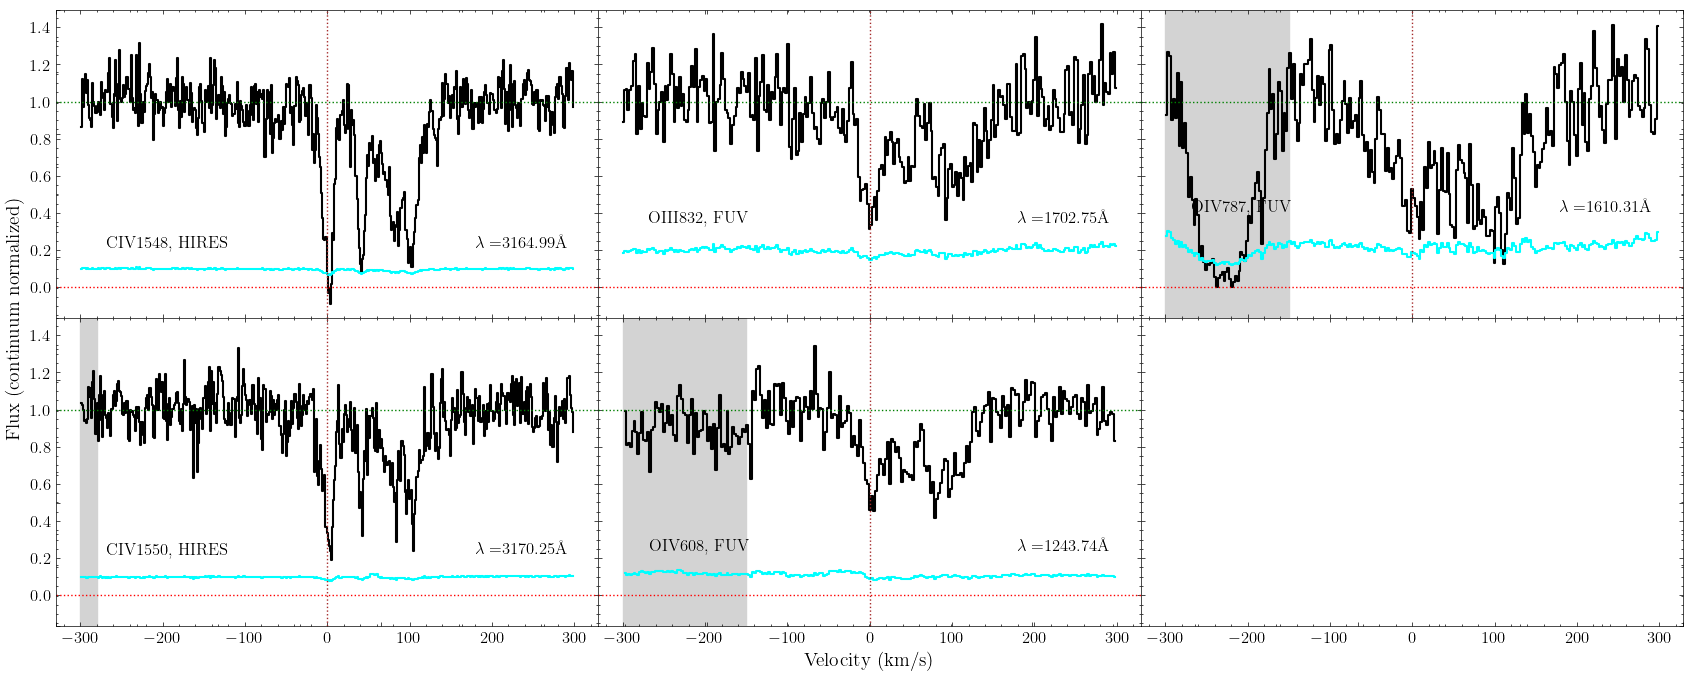

In [454]:
fig, axes = civ_oiii_oiv.plot_ion_suite(n_cols=3)